In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/result_model/FVtest_RF_15AB_1FC_3.csv')

In [4]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [6]:
#Predict
pred_list = list()
prob_list = list()
pred_list_ = list()
fp=dataframe['Views'].tolist()

In [27]:
FP_=[[0.07947124, 0.08379162, 0.07240744, 0.07931547, 0.07126989,
        0.07480546, 0.06671467, 0.06956273, 0.06940117, 0.06747806,
        0.06644661, 0.0664386 , 0.06644632, 0.06645071, 1.        ],
       [0.08444358, 0.08032424, 0.06933342, 0.07108998, 0.07395413,
        0.06702789, 0.07267232, 0.07363787, 0.07241972, 0.06905966,
        0.06668824, 0.06644393, 0.06645061, 0.06645441, 1.        ],
       [0.07777121, 0.07481901, 0.06890828, 0.07152865, 0.06702622,
        0.06652508, 0.06914075, 0.07241472, 0.07170651, 0.06793713,
        0.07956834, 0.07173672, 0.07438546, 0.06653192, 1.        ],
       [0.06504016, 0.06503988, 0.06503184, 0.06911224, 0.06503334,
        0.06502823, 0.06503019, 0.06503543, 0.06503434, 0.06502145,
        0.06503334, 0.06502145, 0.07231519, 0.14322291, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]]
FP = np.array(FP_)
FP.shape

(5, 15)

In [28]:
FP

array([[0.07947124, 0.08379162, 0.07240744, 0.07931547, 0.07126989,
        0.07480546, 0.06671467, 0.06956273, 0.06940117, 0.06747806,
        0.06644661, 0.0664386 , 0.06644632, 0.06645071, 1.        ],
       [0.08444358, 0.08032424, 0.06933342, 0.07108998, 0.07395413,
        0.06702789, 0.07267232, 0.07363787, 0.07241972, 0.06905966,
        0.06668824, 0.06644393, 0.06645061, 0.06645441, 1.        ],
       [0.07777121, 0.07481901, 0.06890828, 0.07152865, 0.06702622,
        0.06652508, 0.06914075, 0.07241472, 0.07170651, 0.06793713,
        0.07956834, 0.07173672, 0.07438546, 0.06653192, 1.        ],
       [0.06504016, 0.06503988, 0.06503184, 0.06911224, 0.06503334,
        0.06502823, 0.06503019, 0.06503543, 0.06503434, 0.06502145,
        0.06503334, 0.06502145, 0.07231519, 0.14322291, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 

In [29]:
y_prob = model.predict_proba(X_test)
# y_prob

In [30]:
result_ = []
for i in range(0,len(y_prob)):
    print(i)
    print(fp[i])
    if fp[i] =='FP-A':
        indx = 0
    elif fp[i] =='FP-B':
        indx = 1
    elif fp[i] =='FP-C':
        indx = 2
    elif fp[i] =='FP-D':
        indx = 3
    else :
        indx = 4
    result = y_prob[i]*FP[indx]
    result_.append(result)

0
FP-A
1
FP-A
2
FP-B
3
FP-C
4
FP-B
5
FP-A
6
FP-B
7
FP-A
8
FP-B
9
FP-A
10
FP-A
11
FP-B
12
FP-B
13
FP-A
14
FP-B
15
FP-C
16
FP-B
17
FP-A
18
FP-A
19
FP-B
20
FP-C
21
FP-D
22
FP-B
23
FP-C
24
FP-B
25
FP-C
26
FP-C
27
FP-C
28
FP-C
29
FP-A
30
FP-A
31
FP-B
32
FP-C
33
FP-B
34
FP-C
35
FP-B
36
FP-C
37
FP-A
38
FP-D
39
FP-A
40
FP-B
41
FP-A
42
FP-B
43
FP-C
44
FP-C
45
FP-B
46
FP-C
47
FP-C
48
FP-C
49
FP-C
50
FP-C
51
FP-C
52
FP-A
53
FP-B
54
FP-A
55
FP-A
56
FP-C
57
FP-B
58
FP-A
59
FP-A
60
FP-A
61
FP-A
62
FP-A
63
FP-B
64
FP-A
65
FP-C
66
FP-B
67
FP-C
68
FP-C
69
FP-B
70
FP-B
71
FP-C
72
FP-C
73
FP-C
74
FP-B
75
FP-C
76
FP-A
77
FP-B
78
FP-A
79
FP-B
80
FP-B
81
FP-C
82
FP-A
83
FP-B
84
FP-A
85
FP-B
86
FP-A
87
FP-A
88
FP-C
89
FP-B
90
FP-B
91
FP-A
92
FP-B
93
FP-C
94
FP-C
95
FP-C
96
FP-A
97
FP-C
98
FP-C
99
FP-B
100
FP-C
101
FP-B
102
FP-A
103
FP-A
104
FP-A
105
FP-A
106
FP-B
107
FP-C
108
FP-A
109
FP-B
110
FP-C
111
FP-C
112
FP-B
113
FP-A
114
FP-A
115
FP-B
116
FP-C
117
FP-B
118
FP-A
119
FP-B
120
FP-C
121
FP-A
122
FP-A
123

In [31]:
# # y_prob[0]*P_15AB_FP
# products = [a * b for a, b in zip(y_prob[0], P_15AB_FP)]
# products

In [32]:
# y_prob = model.predict_proba(X_test)

# result_ = []
# for i in range(0,len(y_prob)):
#     result = [a * b for a, b in zip(y_prob[i], P_15AB_FP)]
#     result_.append(result)

In [33]:
pred_list = list()
prob_list = list()

for i in range(0,len(result_)):
    result = result_[i]
    re_class = list()
    re_prop = list()  
    maxx = np.argmax(result)
    re_class=labels[maxx]
    re_prop = result[14]
    pred_list.append(re_class)
    prob_list.append(re_prop)

In [34]:
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [35]:
p1 = dataframe
act= p1['Sub_class'].tolist()
pred = p1['category'].tolist()
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

        AB01       0.83      0.14      0.23        74
        AB02       0.58      0.23      0.33        60
        AB03       1.00      0.06      0.11        18
        AB04       0.88      0.35      0.50        43
        AB05       1.00      0.10      0.19        29
        AB06       1.00      0.10      0.17        21
        AB07       1.00      0.14      0.25        21
       AB081       1.00      0.22      0.36        32
       AB082       0.92      0.39      0.55        28
       AB083       1.00      0.09      0.17        11
        AB09       1.00      0.42      0.59        26
        AB10       1.00      0.10      0.18        10
        AB11       1.00      0.30      0.47        23
        AB12       0.96      0.73      0.83        59
      Normal       0.73      1.00      0.85       857

    accuracy                           0.75      1312
   macro avg       0.93      0.29      0.39      1312
weighted avg       0.79   

Text(0.5, 21.5, 'Predicted label')

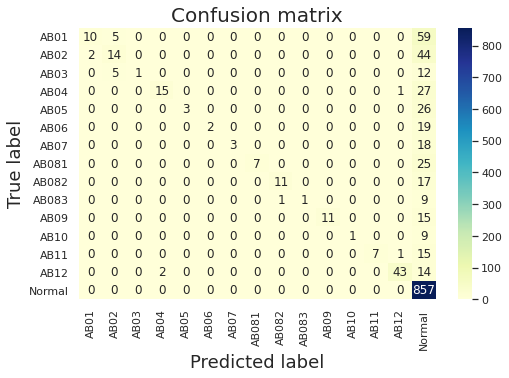

In [36]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)